# PROPOSAL + DATASET
* Churn dataset idea
* Initial IDA/EDA

### Idea

Utilize churn dataset to develop a data science model to build personas based on key datapoints in each customer, at the same time, predicting the likelyhood of a customer churning or continuing it service.


**i.	What is the question you hope to answer?**
- What is the mostly likely persona that will churn and which factors will impact the churn the most.

**ii.	What data are you planning to use to answer that question?**
- Entire dataset at the moment, this could change.

**iii.	What do you know about the data so far?**
- See step 1.
	
**iv.	Why did you choose this topic?**
- I find interesting to build a personas based on just data and context. This is something that can be applicable to many businesses. Building a model that will predict churn can have similar logict to a model predicting cross-category purchasing and etc.



-------------------------------------------------------------------------------------------------------------------

### **Initial Data Analysis**

In [1]:
import pandas as pd
import os
import numpy as np

from pathlib import Path
path = Path('/Users/cpimenta/Documents/gacourse/DATA/')
path = str(path)
os.chdir(path)
os.getcwd()

df = pd.read_csv(path + '//churn_raw_data.csv')
df.head(5)

Unnamed: 0  CaseOrder Customer_id                           Interaction  \
0           1          1     K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
1           2          2     S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524   
2           3          3     K191035  344d114c-3736-4be5-98f7-c72c281e2d35   
3           4          4      D90850  abfa2b40-2d43-4994-b15a-989b8c79e311   
4           5          5     K662701  68a861fd-0d20-4e51-a587-8a90407ee574   

          City State                 County    Zip       Lat        Lng  ...  \
0  Point Baker    AK  Prince of Wales-Hyder  99927  56.25100 -133.37571  ...   
1  West Branch    MI                 Ogemaw  48661  44.32893  -84.24080  ...   
2      Yamhill    OR                Yamhill  97148  45.35589 -123.24657  ...   
3      Del Mar    CA              San Diego  92014  32.96687 -117.24798  ...   
4    Needville    TX              Fort Bend  77461  29.38012  -95.80673  ...   

   MonthlyCharge Bandwidth_GB_Year item1 item2  item3  item4 item5 item6  \
0     171.449762        904.536110     5     5      5      3     4     4   
1     242.948015        800.982766     3     4      3      3     4     3   
2     159.440398       2054.706961     4     4      2      4     4     3   
3     120.249493       2164.579412     4     4      4      2     5     4   
4     150.761216        271.493436     4     4      4      3     4     4   

   item7 item8  
0      3     4  
1      4     4  
2      3     3  
3      3     3  
4      4     5  

[5 rows x 52 columns]

In [2]:
df.sample(5) # print 5 random rows

Unnamed: 0  CaseOrder Customer_id                           Interaction  \
2247        2248       2248     H130516  755aad67-f644-443c-a7fa-01ee6b2c00be   
8665        8666       8666     K465973  45d8dc83-dfb2-47dc-abfc-7a31687147f9   
2834        2835       2835     W370012  09e811cb-5044-4ed9-9dd9-5d6cb6fcb1fe   
5313        5314       5314     K641782  dd3c6b5b-807d-4573-bb32-c7471ebd5ceb   
2477        2478       2478     O608606  c2bf9c9b-6d05-4c94-97e9-fda65bf405ed   

             City State     County    Zip       Lat        Lng  ...  \
2247       Renton    WA       King  98056  47.51287 -122.18958  ...   
8665     Magnolia    MN       Rock  56158  43.63905  -96.07365  ...   
2834  Saint Louis    MO  St. Louis  63113  38.65796  -90.24756  ...   
5313     Langston    OK      Logan  73050  35.93863  -97.26380  ...   
2477      Hospers    IA      Sioux  51238  43.07667  -95.89465  ...   

      MonthlyCharge Bandwidth_GB_Year item1 item2  item3  item4 item5 item6  \
2247     150.966842               NaN     4     4      4      4     4     4   
8665     158.285900       4491.178000     2     3      3      4     3     2   
2834     184.311047       1418.813901     3     3      1      5     2     4   
5313     144.542300       5308.935000     3     3      4      5     4     2   
2477     179.147887        792.181997     3     4      3      3     3     3   

      item7 item8  
2247      3     3  
8665      3     4  
2834      4     3  
5313      3     4  
2477      4     4  

[5 rows x 52 columns]

In [3]:
df.shape # how many rows?

(10000, 52)

In [4]:
df.columns # column names (which is "an index")

Index(['Unnamed: 0', 'CaseOrder', 'Customer_id', 'Interaction', 'City',
       'State', 'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area',
       'Timezone', 'Job', 'Children', 'Age', 'Education', 'Employment',
       'Income', 'Marital', 'Gender', 'Churn', 'Outage_sec_perweek', 'Email',
       'Contacts', 'Yearly_equip_failure', 'Techie', 'Contract', 'Port_modem',
       'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Tenure',
       'MonthlyCharge', 'Bandwidth_GB_Year', 'item1', 'item2', 'item3',
       'item4', 'item5', 'item6', 'item7', 'item8'],
      dtype='object')

In [5]:
df.dtypes # data types of each column

Unnamed: 0                int64
CaseOrder                 int64
Customer_id              object
Interaction              object
City                     object
State                    object
County                   object
Zip                       int64
Lat                     float64
Lng                     float64
Population                int64
Area                     object
Timezone                 object
Job                      object
Children                float64
Age                     float64
Education                object
Employment               object
Income                  float64
Marital                  object
Gender                   object
Churn                    object
Outage_sec_perweek      float64
Email                     int64
Contacts                  int64
Yearly_equip_failure      int64
Techie                   object
Contract                 object
Port_modem               object
Tablet                   object
InternetService          object
Phone   

### Step 1 Exploration

In [6]:
#1.1 Check for missing values
missing_values = df.isnull().sum()

# Print columns with missing values
print("Columns with Missing Values:")
print(missing_values[missing_values > 0])


Columns with Missing Values:
Children             2495
Age                  2475
Income               2490
Techie               2477
InternetService      2129
Phone                1026
TechSupport           991
Tenure                931
Bandwidth_GB_Year    1021
dtype: int64


In [7]:
#1.2 Display summary statistics for numerical features
summary_statistics = df.describe()
print("Summary Statistics for Numerical Features:")
#1.2 Display summary statistics for numerical features
df.describe().transpose()


Summary Statistics for Numerical Features:


count          mean           std         min  \
Unnamed: 0            10000.0   5000.500000   2886.895680    1.000000   
CaseOrder             10000.0   5000.500000   2886.895680    1.000000   
Zip                   10000.0  49153.319600  27532.196108  601.000000   
Lat                   10000.0     38.757567      5.437389   17.966120   
Lng                   10000.0    -90.782536     15.156142 -171.688150   
Population            10000.0   9756.562400  14432.698671    0.000000   
Children               7505.0      2.095936      2.154758    0.000000   
Age                    7525.0     53.275748     20.753928   18.000000   
Income                 7510.0  39936.762226  28358.469482  740.660000   
Outage_sec_perweek    10000.0     11.452955      7.025921   -1.348571   
Email                 10000.0     12.016000      3.025898    1.000000   
Contacts              10000.0      0.994200      0.988466    0.000000   
Yearly_equip_failure  10000.0      0.398000      0.635953    0.000000   
Tenure                 9069.0     34.498858     26.438904    1.000259   
MonthlyCharge         10000.0    174.076305     43.335473   77.505230   
Bandwidth_GB_Year      8979.0   3398.842752   2187.396807  155.506715   
item1                 10000.0      3.490800      1.037797    1.000000   
item2                 10000.0      3.505100      1.034641    1.000000   
item3                 10000.0      3.487000      1.027977    1.000000   
item4                 10000.0      3.497500      1.025816    1.000000   
item5                 10000.0      3.492900      1.024819    1.000000   
item6                 10000.0      3.497300      1.033586    1.000000   
item7                 10000.0      3.509500      1.028502    1.000000   
item8                 10000.0      3.495600      1.028633    1.000000   

                               25%           50%           75%           max  
Unnamed: 0             2500.750000   5000.500000   7500.250000   10000.00000  
CaseOrder              2500.750000   5000.500000   7500.250000   10000.00000  
Zip                   26292.500000  48869.500000  71866.500000   99929.00000  
Lat                      35.341828     39.395800     42.106908      70.64066  
Lng                     -97.082812    -87.918800    -80.088745     -65.66785  
Population              738.000000   2910.500000  13168.000000  111850.00000  
Children                  0.000000      1.000000      3.000000      10.00000  
Age                      35.000000     53.000000     71.000000      89.00000  
Income                19285.522500  33186.785000  53472.395000  258900.70000  
Outage_sec_perweek        8.054362     10.202896     12.487644      47.04928  
Email                    10.000000     12.000000     14.000000      23.00000  
Contacts                  0.000000      1.000000      2.000000       7.00000  
Yearly_equip_failure      0.000000      0.000000      1.000000       6.00000  
Tenure                    7.890442     36.196030     61.426670      71.99928  
MonthlyCharge           141.071078    169.915400    203.777441     315.87860  
Bandwidth_GB_Year      1234.110529   3382.424000   5587.096500    7158.98200  
item1                     3.000000      3.000000      4.000000       7.00000  
item2                     3.000000      4.000000      4.000000       7.00000  
item3                     3.000000      3.000000      4.000000       8.00000  
item4                     3.000000      3.000000      4.000000       7.00000  
item5                     3.000000      3.000000      4.000000       7.00000  
item6                     3.000000      3.000000      4.000000       8.00000  
item7                     3.000000      4.000000      4.000000       7.00000  
item8                     3.000000      3.000000      4.000000       8.00000

In [8]:
# Filter the DataFrame where Churn is 'Yes'
churn_yes_df = df[df['Churn'] == 'Yes']

# Display summary statistics for numerical features where Churn is 'Yes'
summary_statistics_churn_yes = churn_yes_df.describe()
print("Summary Statistics for Numerical Features where Churn is 'Yes':")
summary_statistics_churn_yes.transpose()


Summary Statistics for Numerical Features where Churn is 'Yes':


count          mean           std         min  \
Unnamed: 0            2650.0   3032.654340   2124.853705    2.000000   
CaseOrder             2650.0   3032.654340   2124.853705    2.000000   
Zip                   2650.0  49529.236604  27634.367323  647.000000   
Lat                   2650.0     38.842563      5.449662   17.966120   
Lng                   2650.0    -90.898705     15.172441 -170.485200   
Population            2650.0   9551.461509  14031.080851    0.000000   
Children              1985.0      2.108312      2.103151    0.000000   
Age                   1989.0     53.521368     20.800968   18.000000   
Income                1962.0  40676.114409  29280.571846  938.810000   
Outage_sec_perweek    2650.0     11.303038      6.735570   -1.195428   
Email                 2650.0     12.078113      3.008534    2.000000   
Contacts              2650.0      1.008302      0.989911    0.000000   
Yearly_equip_failure  2650.0      0.381132      0.606700    0.000000   
Tenure                2420.0     13.216122     15.659047    1.000259   
MonthlyCharge         2650.0    200.597581     41.697139   91.448900   
Bandwidth_GB_Year     2368.0   1784.081147   1382.510272  248.179366   
item1                 2650.0      3.478113      1.052641    1.000000   
item2                 2650.0      3.482264      1.036821    1.000000   
item3                 2650.0      3.467925      1.039749    1.000000   
item4                 2650.0      3.491698      1.022642    1.000000   
item5                 2650.0      3.469057      1.028099    1.000000   
item6                 2650.0      3.499245      1.045311    1.000000   
item7                 2650.0      3.494340      1.036228    1.000000   
item8                 2650.0      3.505283      1.039141    1.000000   

                               25%           50%           75%            max  
Unnamed: 0             1402.250000   2747.000000   4228.000000    9980.000000  
CaseOrder              1402.250000   2747.000000   4228.000000    9980.000000  
Zip                   26326.500000  49064.500000  72148.250000   99927.000000  
Lat                      35.492800     39.247420     42.083827      70.640660  
Lng                     -97.247267    -87.987035    -80.123160     -65.943130  
Population              749.500000   2918.000000  12445.000000   98660.000000  
Children                  1.000000      2.000000      3.000000      10.000000  
Age                      35.000000     54.000000     71.000000      89.000000  
Income                19337.190000  34286.930000  54723.437500  189938.400000  
Outage_sec_perweek        8.019462     10.124257     12.419265      46.641806  
Email                    10.000000     12.000000     14.000000      23.000000  
Contacts                  0.000000      1.000000      2.000000       7.000000  
Yearly_equip_failure      0.000000      0.000000      1.000000       3.000000  
Tenure                    4.096463      7.865075     13.756769      71.645510  
MonthlyCharge           169.577424    200.341390    233.595229     315.878600  
Bandwidth_GB_Year       973.858246   1356.210829   1898.960339    7096.495000  
item1                     3.000000      3.000000      4.000000       7.000000  
item2                     3.000000      3.000000      4.000000       7.000000  
item3                     3.000000      3.000000      4.000000       7.000000  
item4                     3.000000      3.500000      4.000000       7.000000  
item5                     3.000000      3.000000      4.000000       7.000000  
item6                     3.000000      3.000000      4.000000       7.000000  
item7                     3.000000      3.000000      4.000000       7.000000  
item8                     3.000000      3.000000      4.000000       7.000000

In [9]:
#1.3 Display unique values and counts for categorical features
categorical_features = df.select_dtypes(include=['object']).columns
for feature in categorical_features:
    unique_values = df[feature].value_counts()
    print(f"\nUnique values for {feature}:\n{unique_values}")



Unique values for Customer_id:
Customer_id
K409198    1
X300173    1
M155745    1
G126132    1
O148559    1
          ..
F454437    1
W845098    1
P854487    1
K983374    1
T38070     1
Name: count, Length: 10000, dtype: int64

Unique values for Interaction:
Interaction
aa90260b-4141-4a24-8e36-b04ce1f4f77b    1
26769b47-8eda-4e14-9baf-7348b64b7da3    1
6d65ca83-1001-4d01-a3f9-c3ae5ac33a83    1
448944cf-10f6-4a04-a8e0-4079b6791e26    1
a9890702-06c6-4337-9d5b-65f7d1e30466    1
                                       ..
c650b63b-2d68-48f2-911d-6e8c838c8185    1
3006986f-69e9-4c80-8dcb-1f8d917f2071    1
0e3b8690-177a-4bce-a4e9-823682ce8aec    1
25400298-b615-407d-9e79-25fb89b38429    1
9de5fb6e-bd33-4995-aec8-f01d0172a499    1
Name: count, Length: 10000, dtype: int64

Unique values for City:
City
Houston         34
New York        24
Springfield     23
Buffalo         23
San Antonio     22
                ..
Cottontown       1
San Dimas        1
Fort Hill        1
Webster          1
Clark

### Step 1 Summary:

**1.1 Missing Values:**

Several columns have missing values, including 'Children', 'Age', 'Income', 'Techie', 'InternetService', 'Phone', 'TechSupport', 'Tenure', and 'Bandwidth_GB_Year'.

How should I address null values? Imputation? Removal? Median value?
- Children: NaN --> 0
- Age: add median? or something more robust? i.e, if customer without an age has a Master's Degree then look at the median age of master' degree customers?
- Income: add median? or something more robust, similar to the age example.
- Techie: look at age then determine if yes or no? 
- InternetService and Phone and TechSupport: NaN --> NO or 0 
- Tenure: add median? Is this months?
- Bandwidth_GB_Year: add median?

**1.2 Summary Statistics for Numerical Features:**

We have information on various numerical features, including location data, population, outage metrics, and customer satisfaction scores. 
- Age is on average 53. 
- Income is on average 40K with a max of 259K so need to plot distribution. 
- Outage_sec_perweek is on average 11 secs. 
- Monthly Charge is 174 with a max of 315, need to plot distribution.
- Will take a deep dive on Item 1 through 8 on EDA level 2.

**1.3 Categorical Feature Exploration:**

- 10000 unique customers
- 6058 unique cities
- TX, NY, PA, CA, IL have more than 400 rows each ~ 25% of dataset.
- 1620 unique counties
- Three areas: Suburban 3346 rows, Urban 3327 rows and Rural 3327 rows.
- 639 unique jobs: Ocuppational Psychologist, number 1 at 30 rows.
- 60% of customers are full time

### Step 2 Vizualization

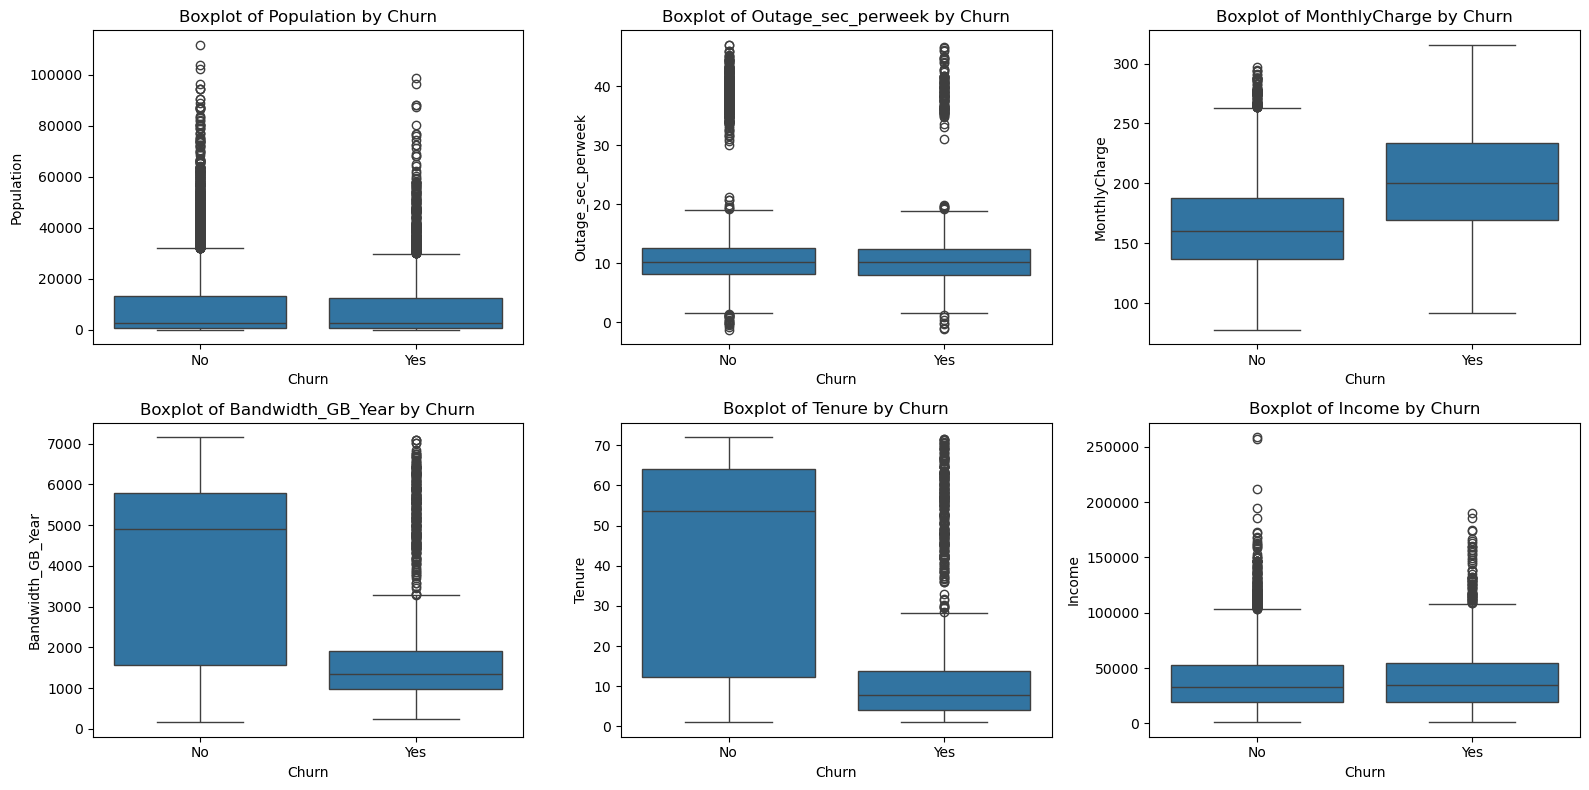

In [10]:
#2.1 Vizualzing boxplots churn and numercal features
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(16, 8))

# Create a boxplot for selected numerical features
numerical_features = ['Population', 'Outage_sec_perweek', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Tenure','Income']
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Churn', y=feature, data=df)
    plt.title(f'Boxplot of {feature} by Churn')

plt.tight_layout()
plt.show()

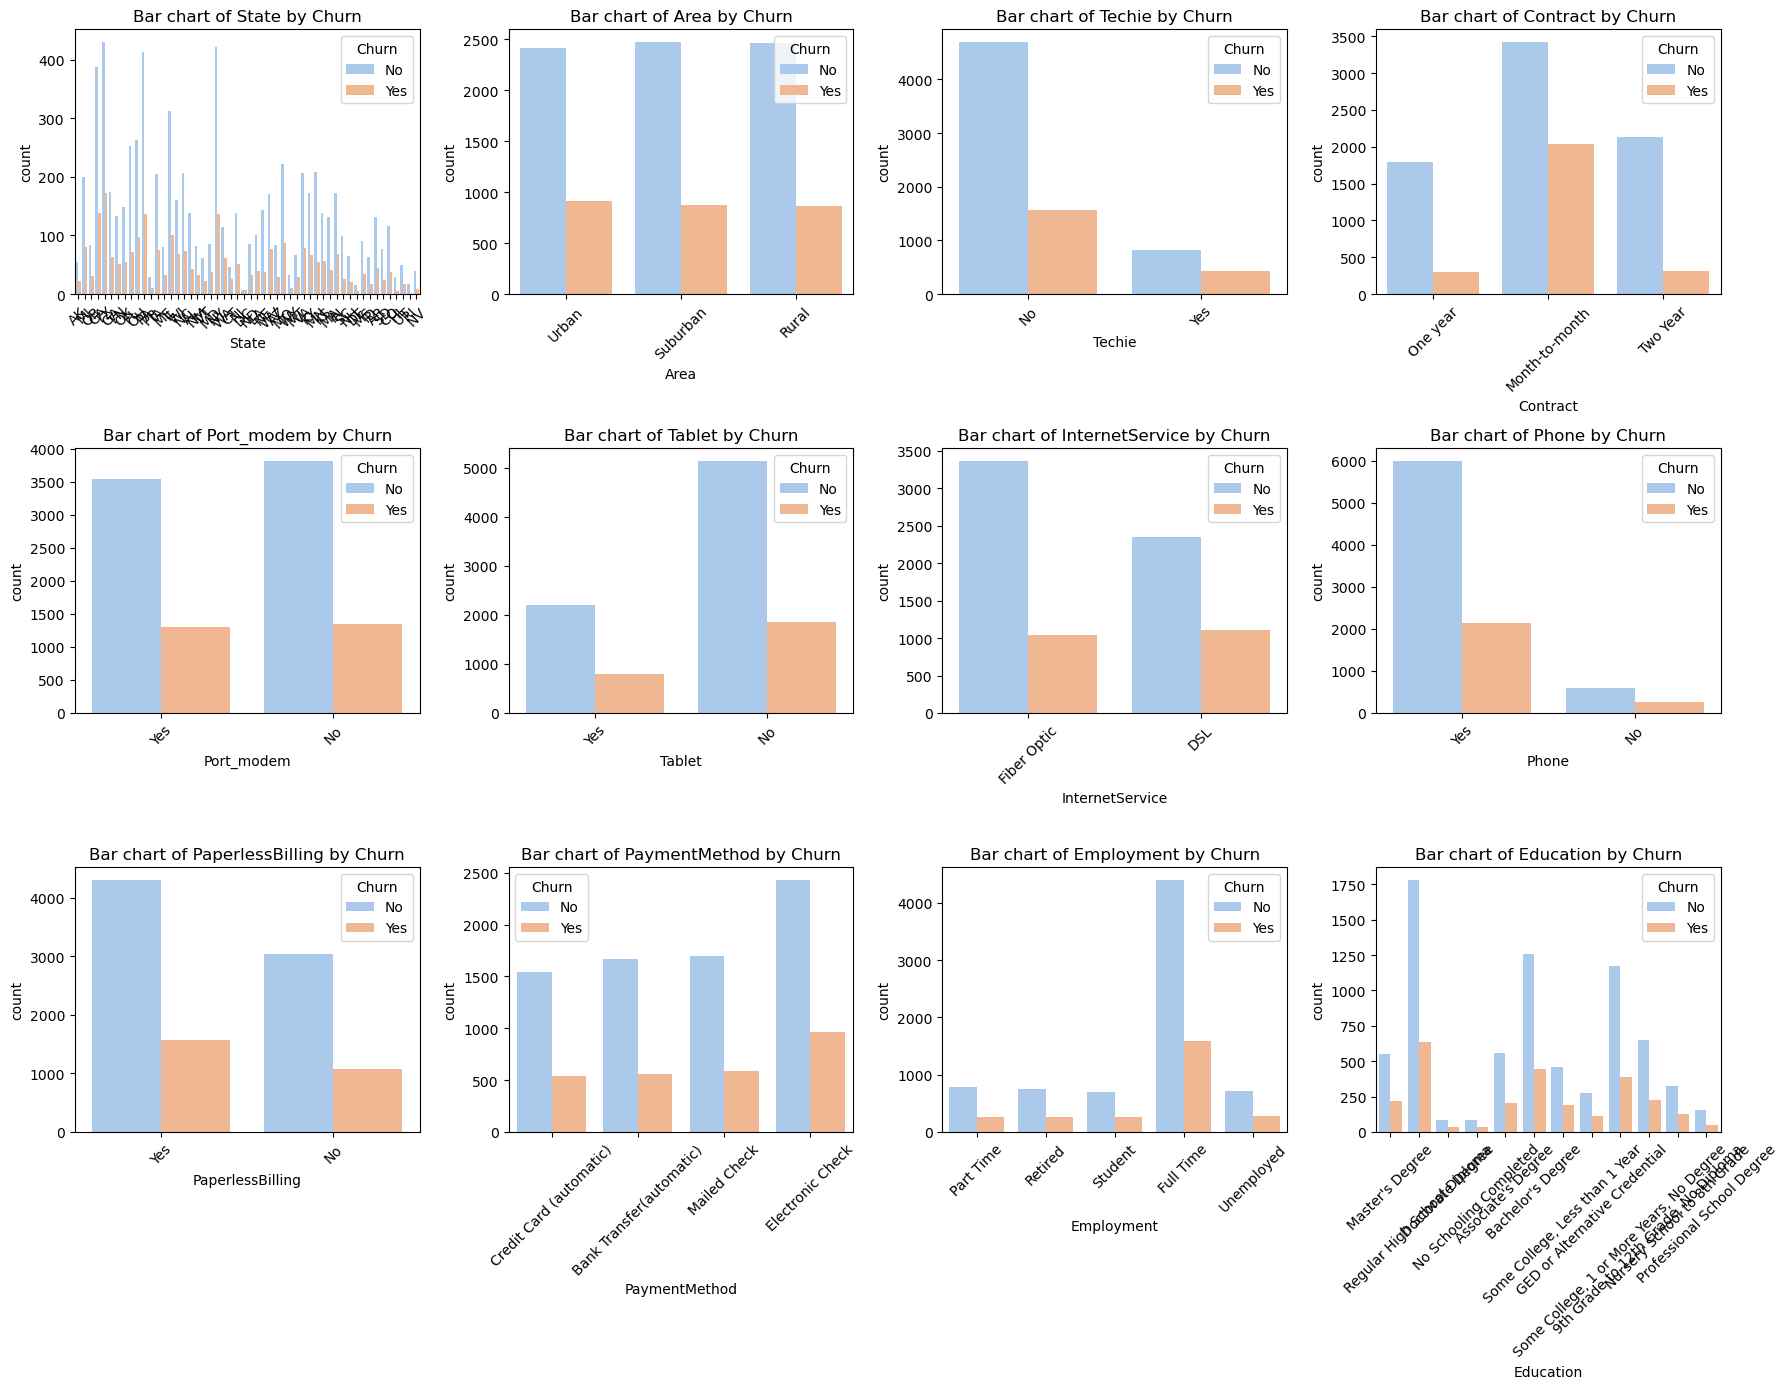

In [11]:
#2.2 vizulazing categorical features and churned customers
# Set up the matplotlib figure
plt.figure(figsize=(18, 14))

# Create bar plots for selected categorical features
categorical_features = ['State', 'Area', 'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService', 'Phone', 'PaperlessBilling', 'PaymentMethod','Employment','Education']
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 4, i)
    sns.countplot(x=feature, hue='Churn', data=df, palette='pastel')
    plt.title(f'Bar chart of {feature} by Churn')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

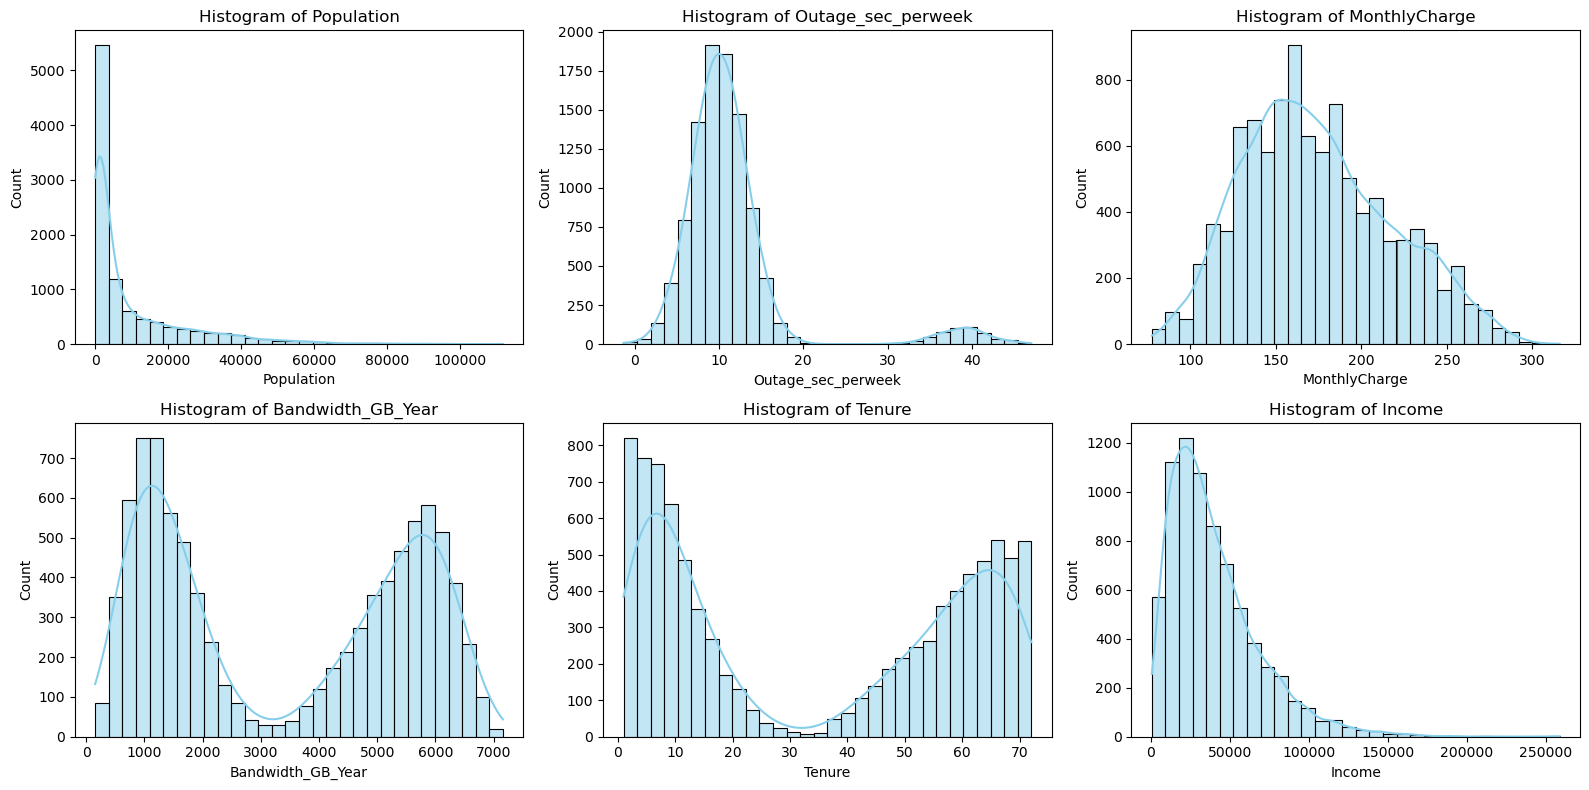

In [12]:
#2.3 Numercal features with histogram

# Set up the matplotlib figure
plt.figure(figsize=(16, 8))

# Create histograms for selected numerical features
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[feature], bins=30, kde=True, color='skyblue')
    plt.title(f'Histogram of {feature}')

plt.tight_layout()
plt.show()


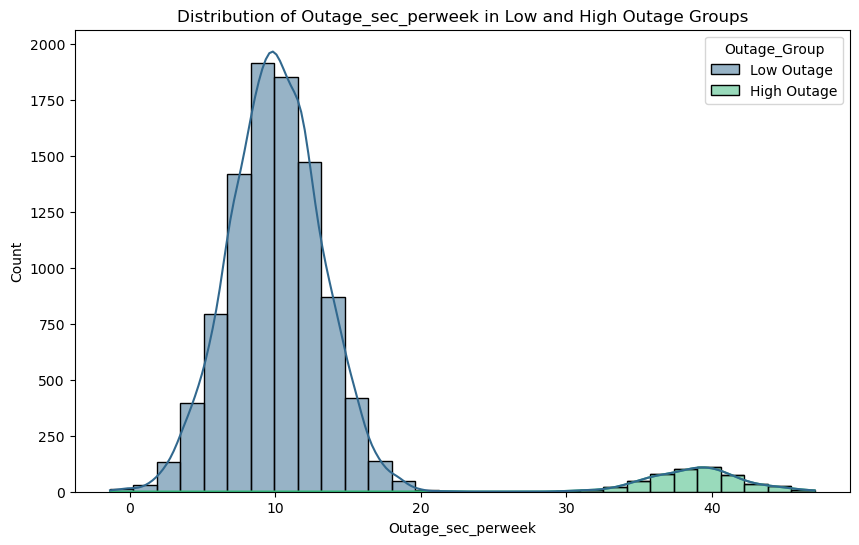

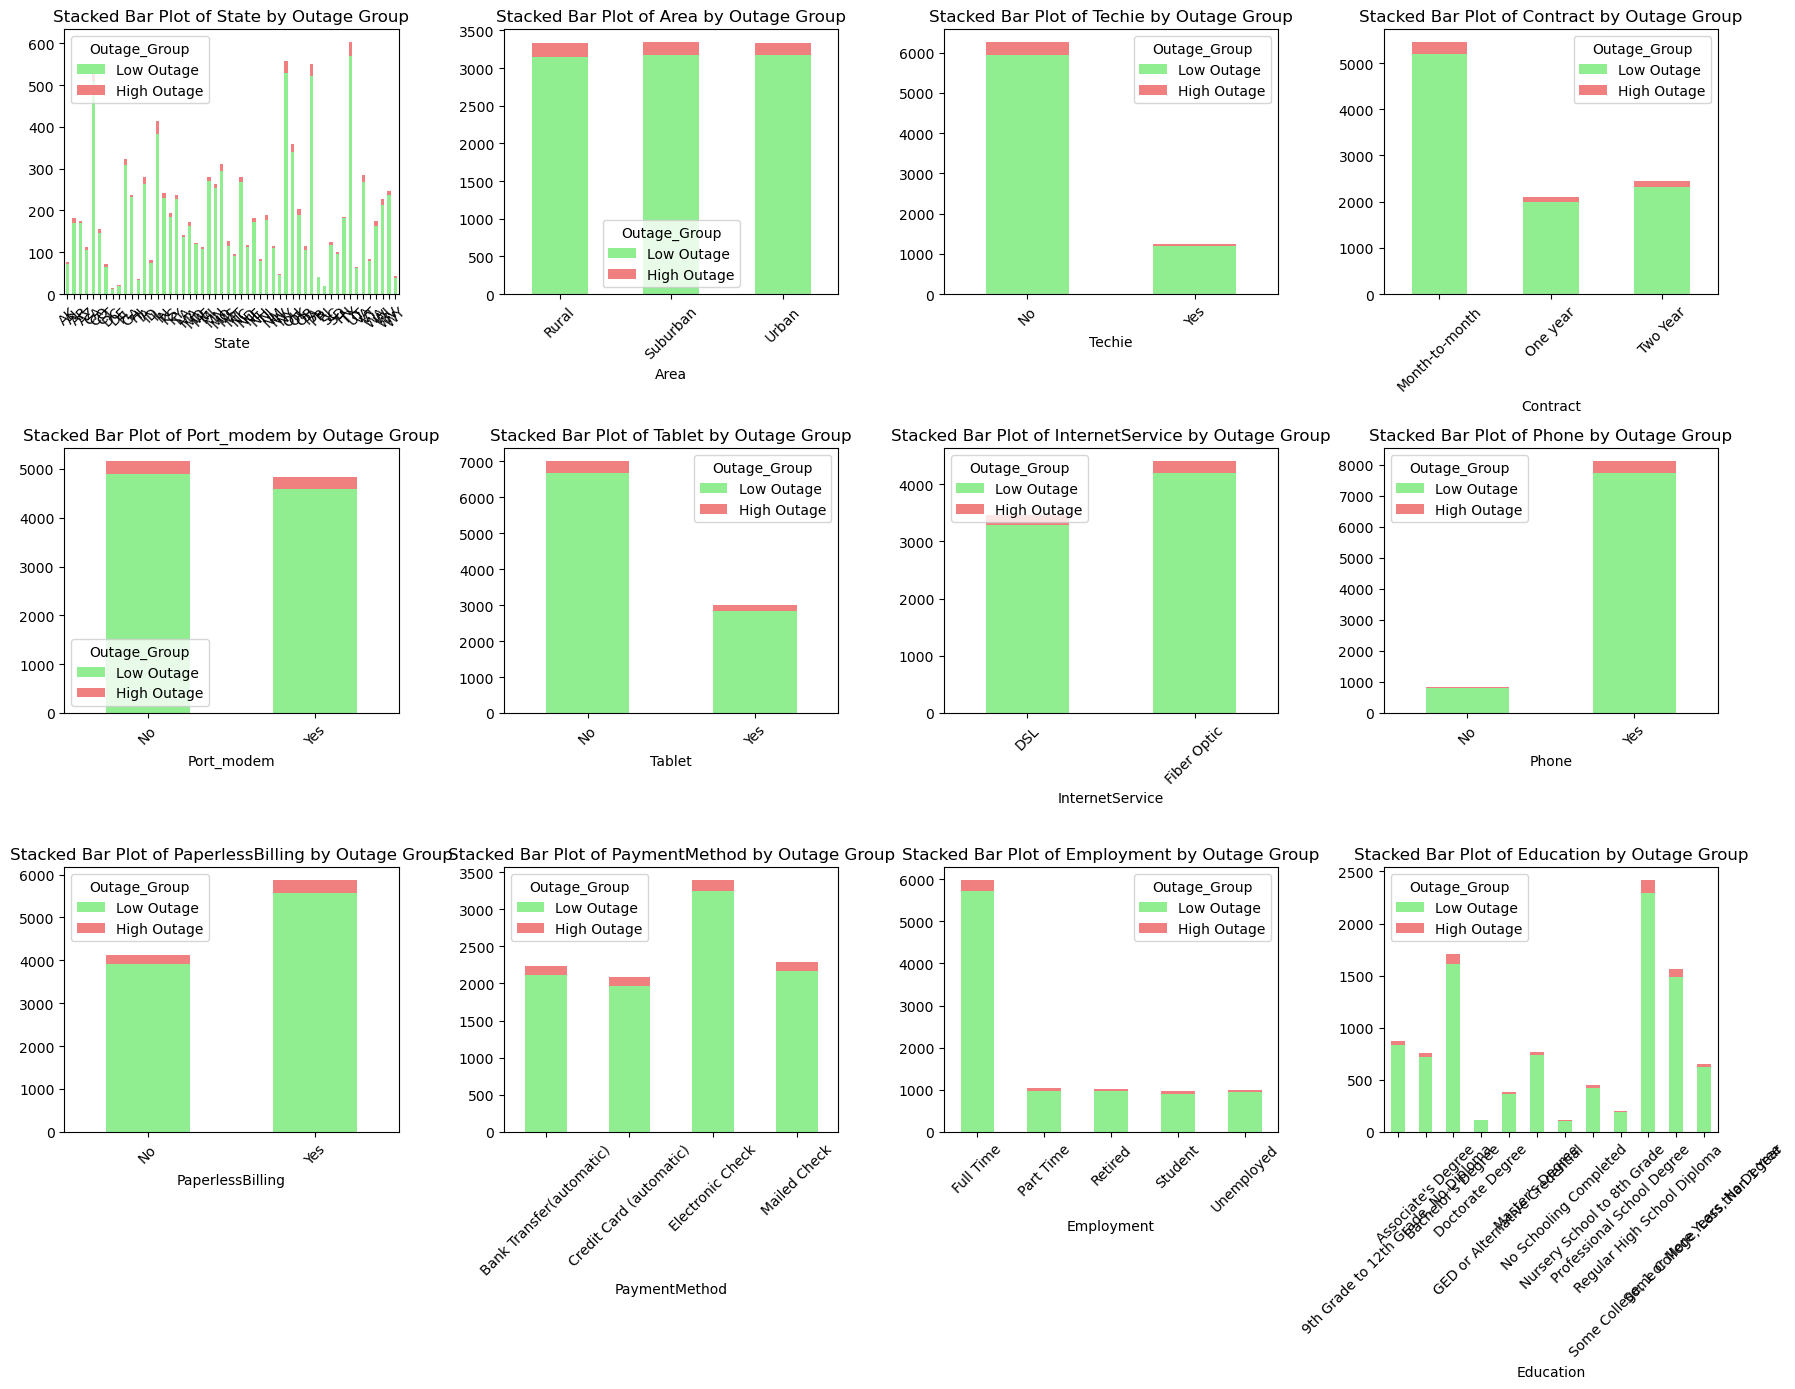

In [13]:
#diving deeper into outage sec per week
# Create a new column 'Outage_Group' based on the observed peaks
df['Outage_Group'] = pd.cut(df['Outage_sec_perweek'], bins=[-np.inf, 20, np.inf], labels=['Low Outage', 'High Outage'])

# Visualize the distribution of 'Outage_sec_perweek' in the two groups
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Outage_sec_perweek', hue='Outage_Group', bins=30, kde=True, multiple='stack', palette='viridis')
plt.title('Distribution of Outage_sec_perweek in Low and High Outage Groups')
plt.show()

# Set up the matplotlib figure
plt.figure(figsize=(18, 14))

# Create stacked bar plots for selected categorical features, comparing 'Low Outage' and 'High Outage' groups
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 4, i)
    pd.crosstab(df[feature], df['Outage_Group']).plot(kind='bar', stacked=True, color=['lightgreen', 'lightcoral'], ax=plt.gca())
    plt.title(f'Stacked Bar Plot of {feature} by Outage Group')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

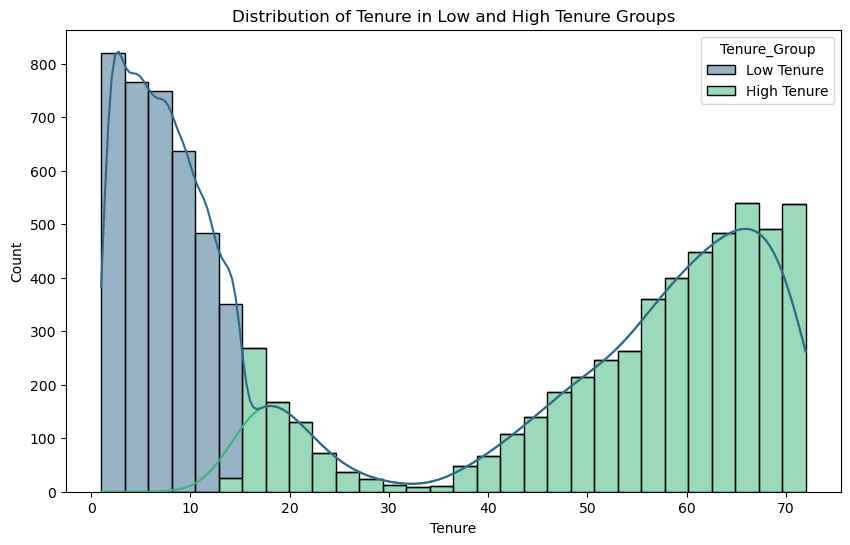

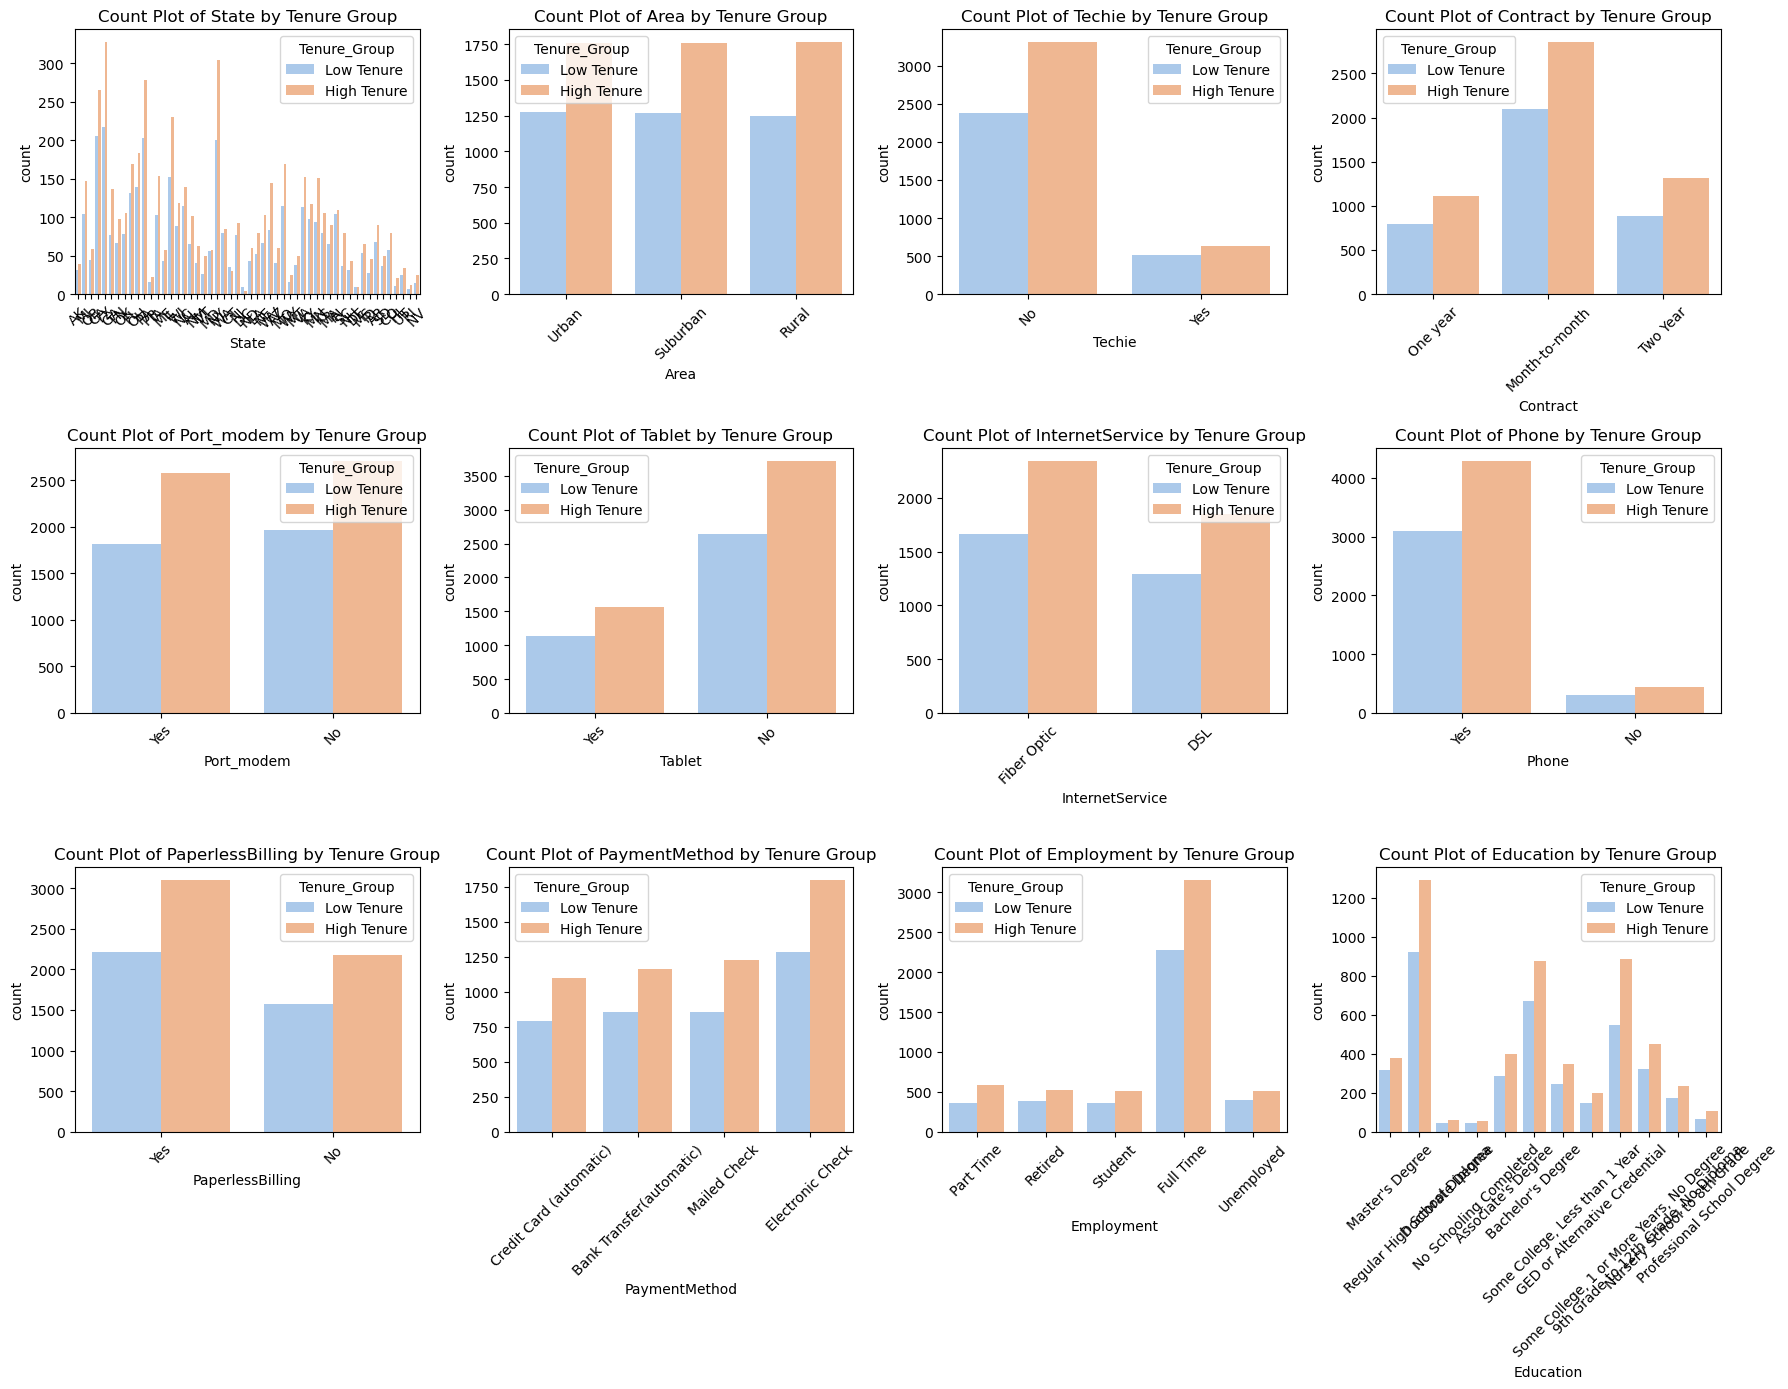

In [14]:
#deep dive on tenure column

# Create a new column 'Tenure_Group' based on the observed U-shaped distribution
df['Tenure_Group'] = pd.cut(df['Tenure'], bins=[-np.inf, 15, np.inf], labels=['Low Tenure', 'High Tenure'])

# Visualize the distribution of 'Tenure' in the two groups
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Tenure', hue='Tenure_Group', bins=30, kde=True, multiple='stack', palette='viridis')
plt.title('Distribution of Tenure in Low and High Tenure Groups')
plt.show()


# Set up the matplotlib figure
plt.figure(figsize=(18, 14))

# Create count plots for selected categorical features, comparing 'Low Tenure' and 'High Tenure' groups
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 4, i)
    sns.countplot(x=feature, hue='Tenure_Group', data=df, palette='pastel')
    plt.title(f'Count Plot of {feature} by Tenure Group')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

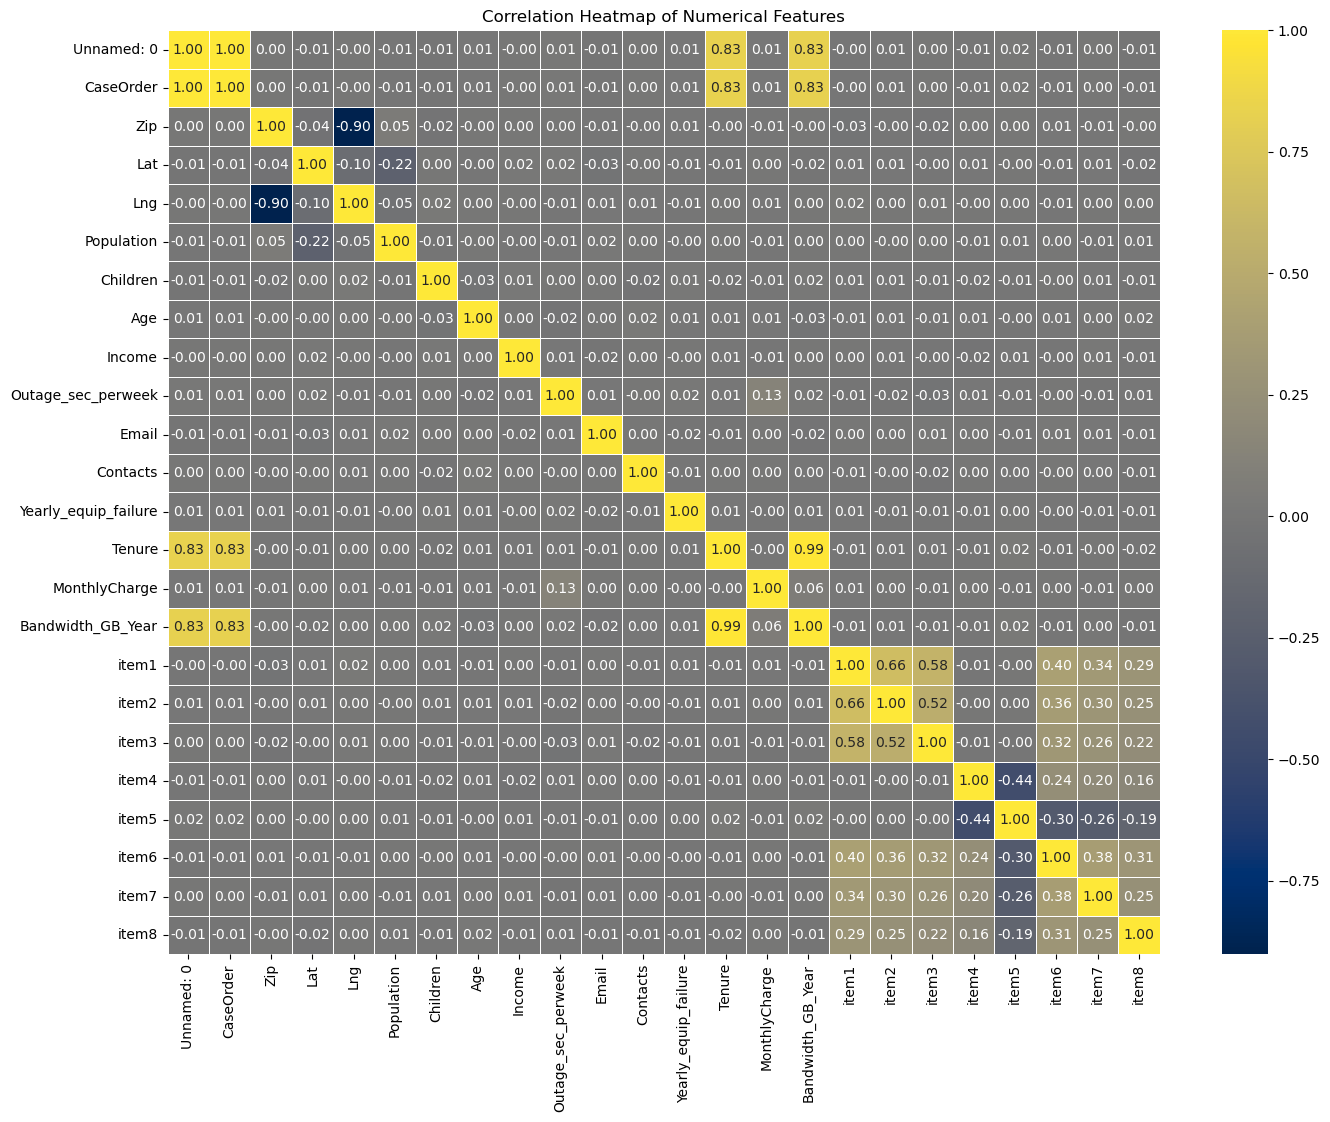

In [15]:
#2.4 Correlation Matrix

# Select only numerical columns for correlation analysis
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numerical_columns].corr()

# Set up the matplotlib figure
plt.figure(figsize=(16, 12))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, cmap='cividis', annot=True, fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()



/Users/cpimenta/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


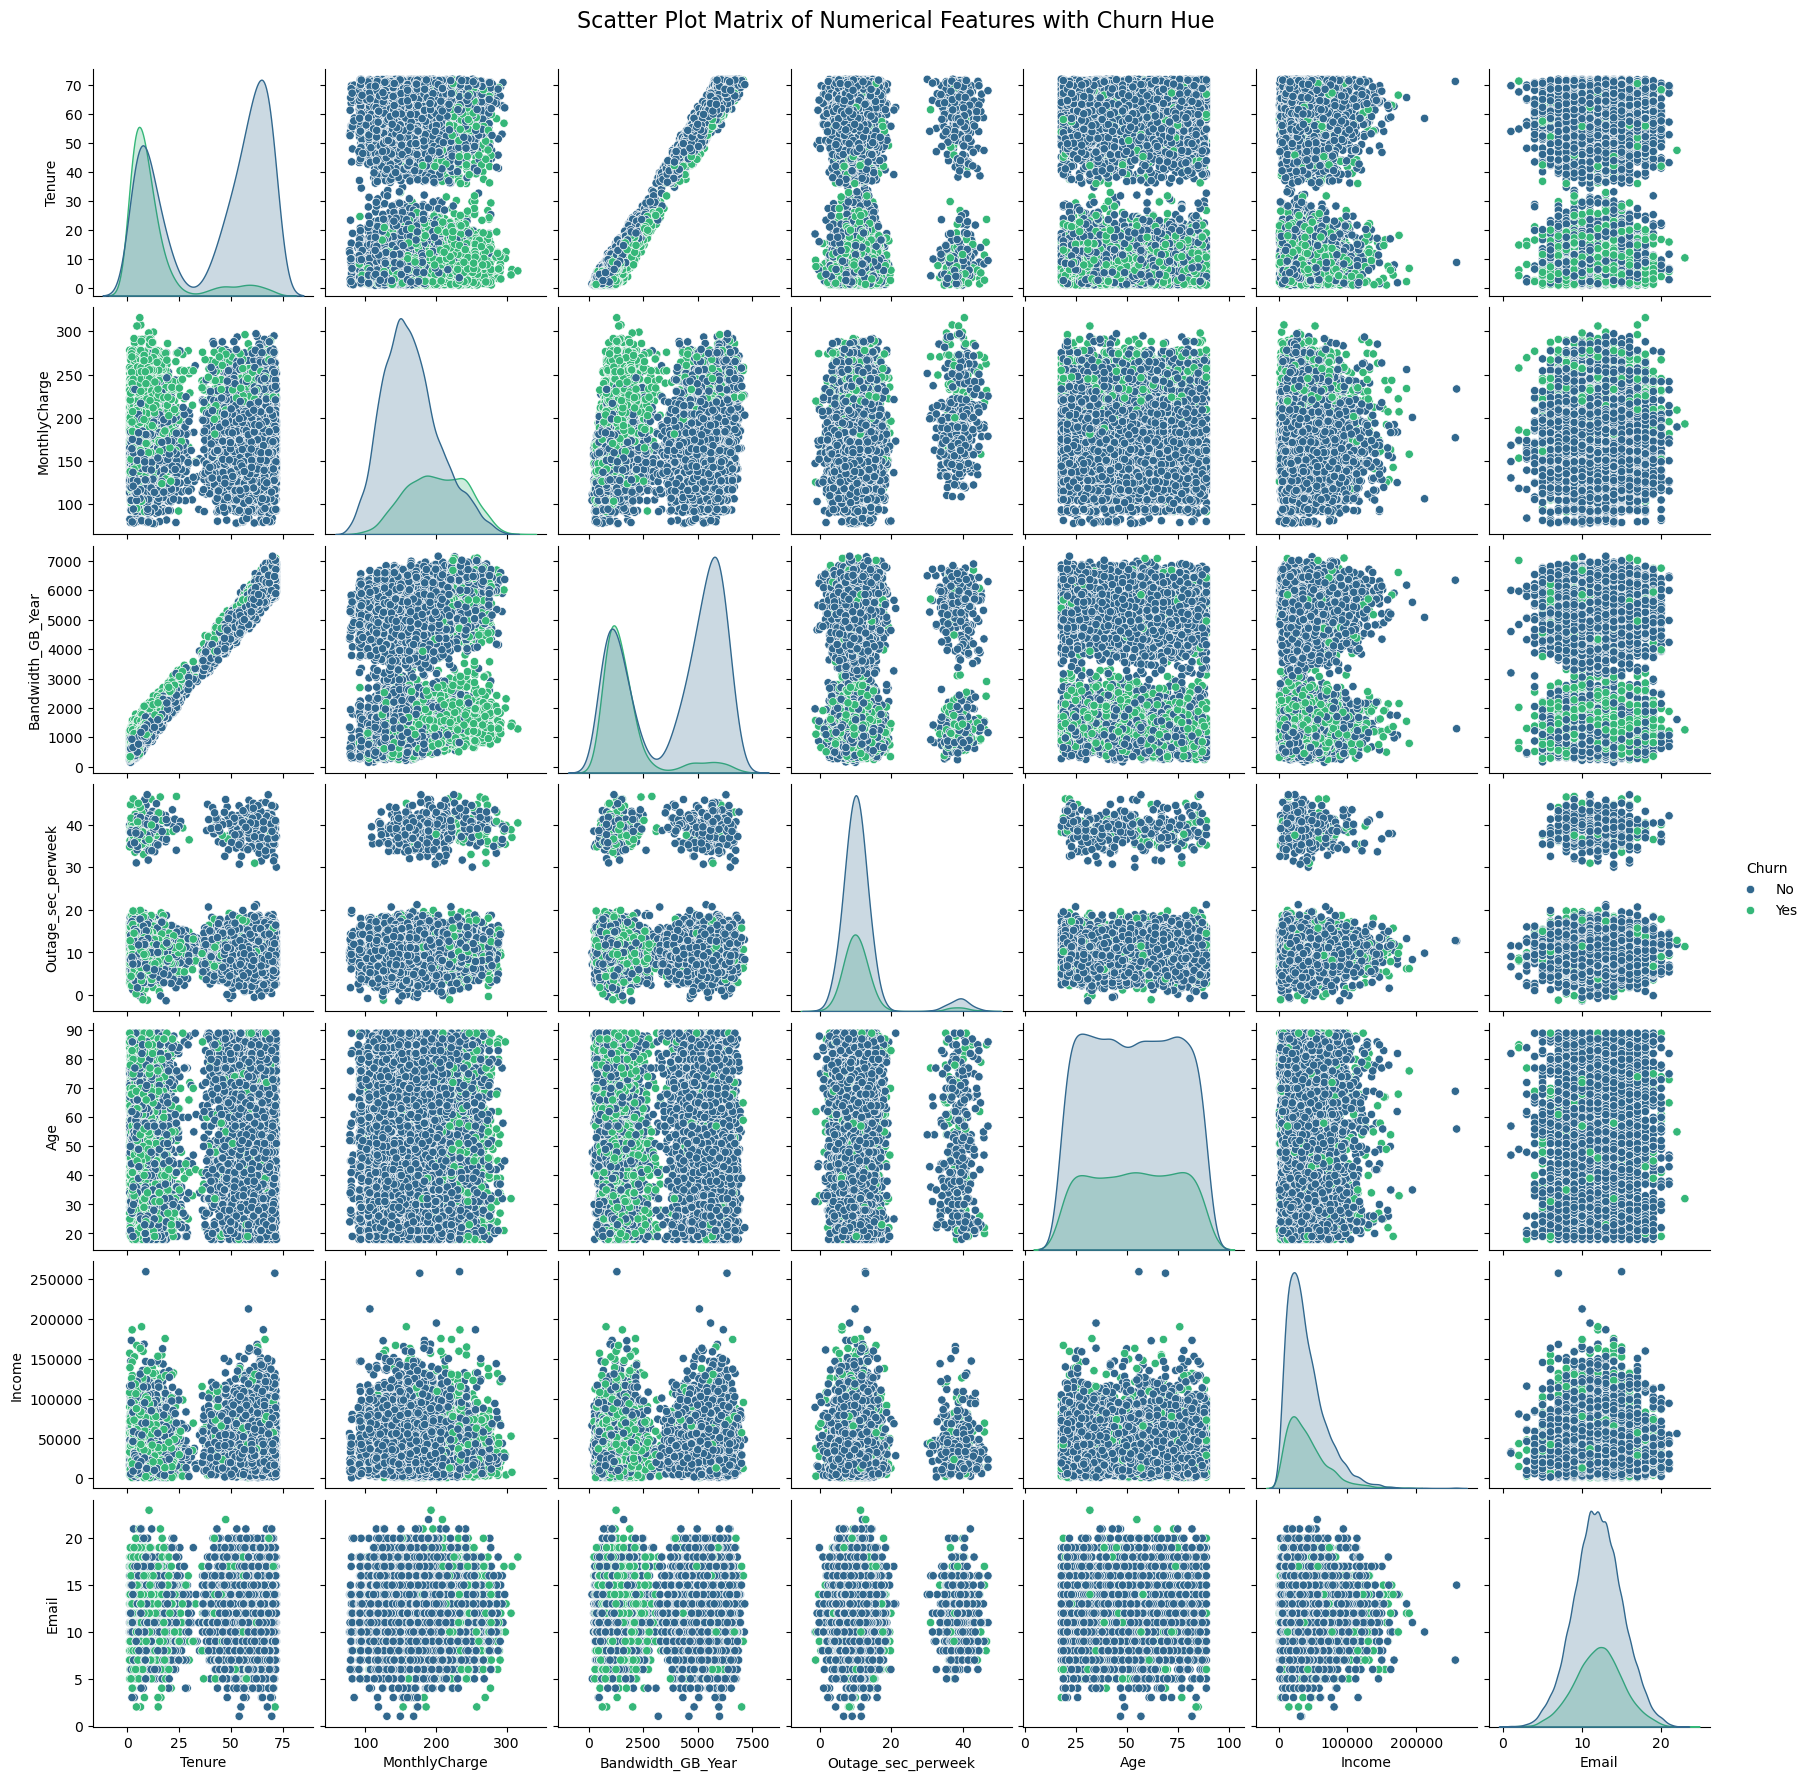

In [16]:
#2.5 scatter plot matrix

# Select a subset of numerical features for the scatter plot matrix
selected_numerical_features = ['Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Outage_sec_perweek','Age','Income','Email']

# Create a scatter plot matrix with 'Churn' as the hue
sns.pairplot(df[selected_numerical_features + ['Churn']], hue='Churn', diag_kind='kde', palette='viridis')
plt.suptitle('Scatter Plot Matrix of Numerical Features with Churn Hue', y=1.02, size=16)
plt.show()



In [17]:
df.columns

Index(['Unnamed: 0', 'CaseOrder', 'Customer_id', 'Interaction', 'City',
       'State', 'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area',
       'Timezone', 'Job', 'Children', 'Age', 'Education', 'Employment',
       'Income', 'Marital', 'Gender', 'Churn', 'Outage_sec_perweek', 'Email',
       'Contacts', 'Yearly_equip_failure', 'Techie', 'Contract', 'Port_modem',
       'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Tenure',
       'MonthlyCharge', 'Bandwidth_GB_Year', 'item1', 'item2', 'item3',
       'item4', 'item5', 'item6', 'item7', 'item8', 'Outage_Group',
       'Tenure_Group'],
      dtype='object')

In [18]:
# Define the new names for 'item1' through 'item8' columns
new_item_names = ['Timely_response', 'Timely_fixes', 'Timely_replacements',
                  'Reliability', 'Options', 'Respectful_response',
                  'Courteous_exchange', 'Evidence_of_active_listening']

# Create a dictionary mapping old column names to new column names
column_rename_mapping = dict(zip(df.columns[-10:-2], new_item_names))

# Rename the specified columns
df.rename(columns=column_rename_mapping, inplace=True)

# Display the updated column names
df.columns


Index(['Unnamed: 0', 'CaseOrder', 'Customer_id', 'Interaction', 'City',
       'State', 'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area',
       'Timezone', 'Job', 'Children', 'Age', 'Education', 'Employment',
       'Income', 'Marital', 'Gender', 'Churn', 'Outage_sec_perweek', 'Email',
       'Contacts', 'Yearly_equip_failure', 'Techie', 'Contract', 'Port_modem',
       'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Tenure',
       'MonthlyCharge', 'Bandwidth_GB_Year', 'Timely_response', 'Timely_fixes',
       'Timely_replacements', 'Reliability', 'Options', 'Respectful_response',
       'Courteous_exchange', 'Evidence_of_active_listening', 'Outage_Group',
       'Tenure_Group'],
      dtype='object')

/var/folders/hc/gs5xhxg91pgdk1bwtqhpyn6w1jz4qp/T/ipykernel_48431/1082981587.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=rating_column, data=df, palette='viridis')


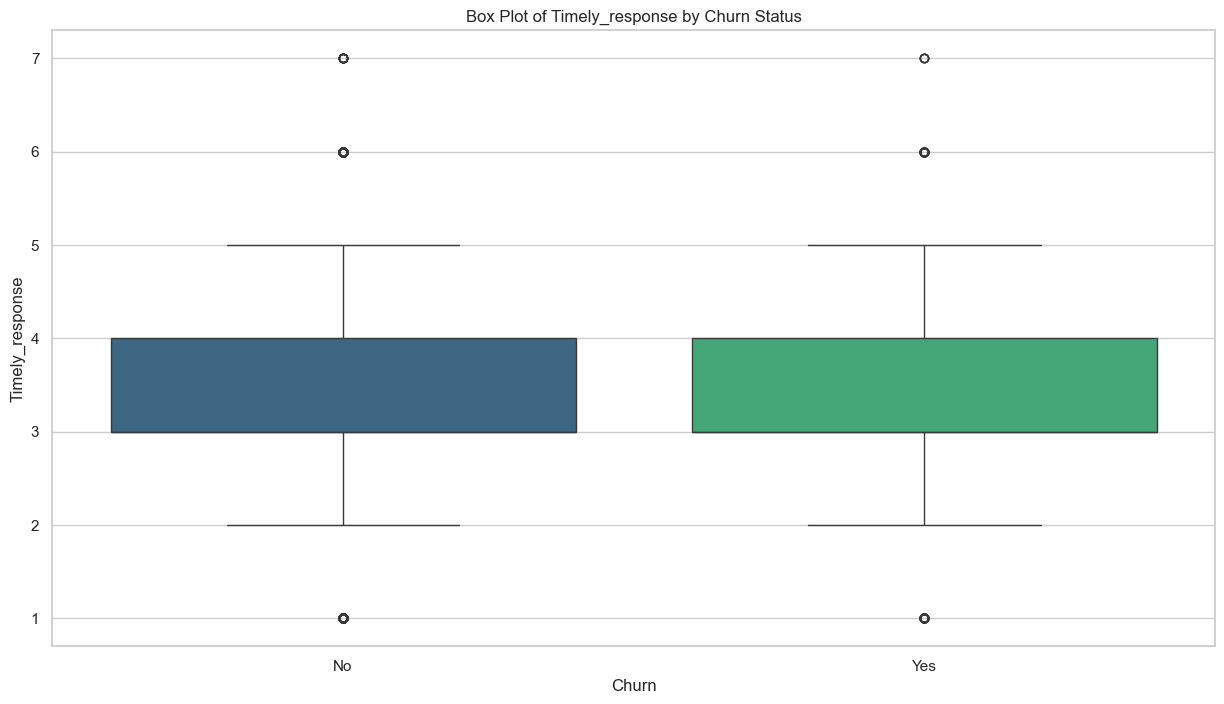

/var/folders/hc/gs5xhxg91pgdk1bwtqhpyn6w1jz4qp/T/ipykernel_48431/1082981587.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=rating_column, data=df, palette='viridis')


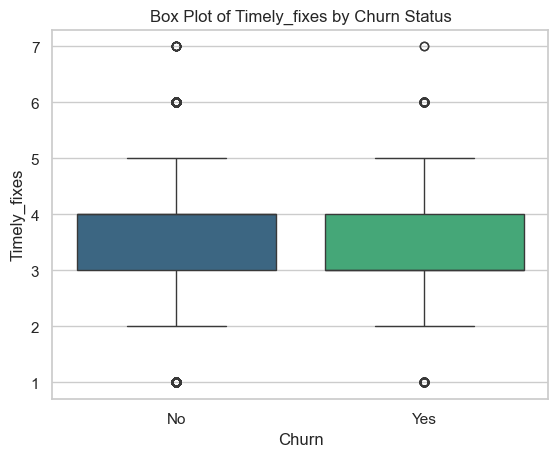

/var/folders/hc/gs5xhxg91pgdk1bwtqhpyn6w1jz4qp/T/ipykernel_48431/1082981587.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=rating_column, data=df, palette='viridis')


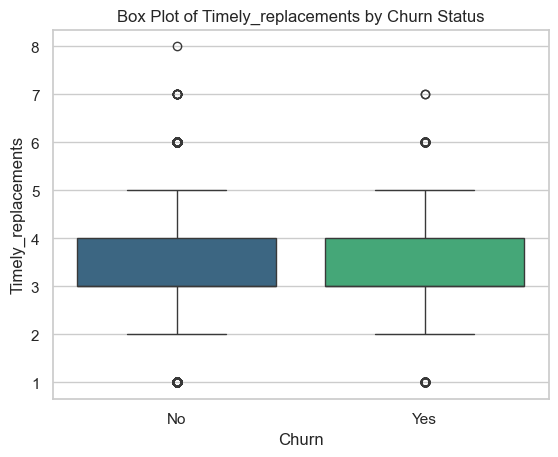

/var/folders/hc/gs5xhxg91pgdk1bwtqhpyn6w1jz4qp/T/ipykernel_48431/1082981587.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=rating_column, data=df, palette='viridis')


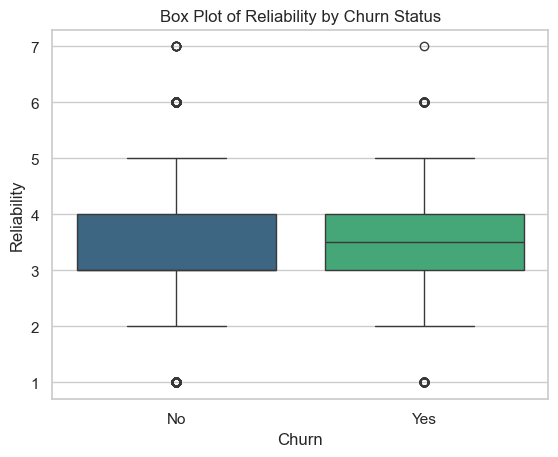

/var/folders/hc/gs5xhxg91pgdk1bwtqhpyn6w1jz4qp/T/ipykernel_48431/1082981587.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=rating_column, data=df, palette='viridis')


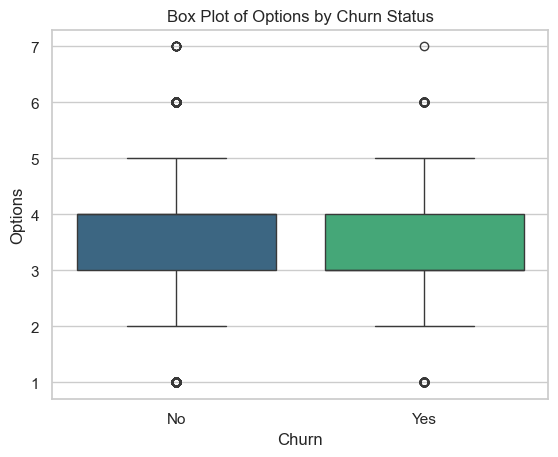

/var/folders/hc/gs5xhxg91pgdk1bwtqhpyn6w1jz4qp/T/ipykernel_48431/1082981587.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=rating_column, data=df, palette='viridis')


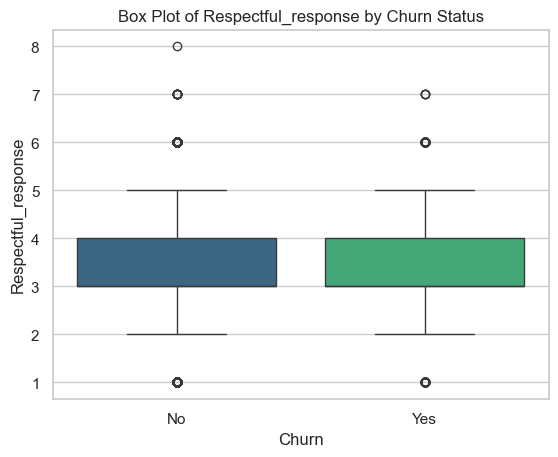

/var/folders/hc/gs5xhxg91pgdk1bwtqhpyn6w1jz4qp/T/ipykernel_48431/1082981587.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=rating_column, data=df, palette='viridis')


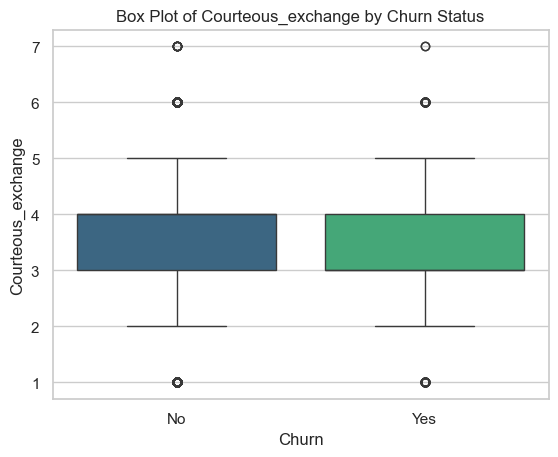

/var/folders/hc/gs5xhxg91pgdk1bwtqhpyn6w1jz4qp/T/ipykernel_48431/1082981587.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=rating_column, data=df, palette='viridis')


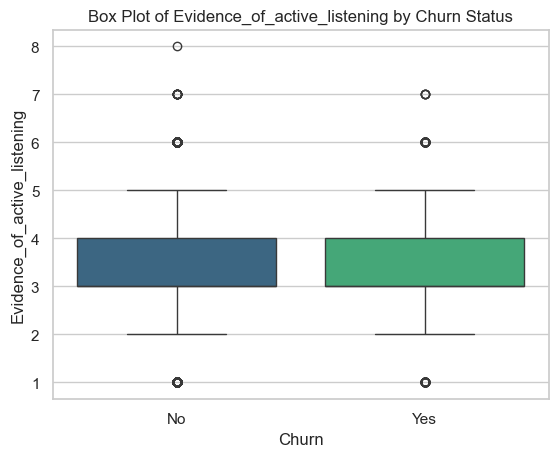

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for better visualization
sns.set(style="whitegrid")

# Specify the ratings columns for visualization
ratings_columns = ['Timely_response', 'Timely_fixes', 'Timely_replacements',
                    'Reliability', 'Options', 'Respectful_response',
                    'Courteous_exchange', 'Evidence_of_active_listening']

# Create box plots for each rating with respect to churn status
plt.figure(figsize=(15, 8))
for rating_column in ratings_columns:
    sns.boxplot(x='Churn', y=rating_column, data=df, palette='viridis')
    plt.title(f'Box Plot of {rating_column} by Churn Status')
    plt.show()


### Step 2 Summary:

**Analyzing columns on Churn customers:**

When looking at numerical columns on churn column through boxplots, I noticed: 
- Monthly charge mean on Churn = Yes customers is higher than customers that Churn = No
- Bandwidth usage also was lower for customers that Churn = Yes
- Churn = Yes was higher on Techie column
- Correlation and scatter plot matrix confirmed monthly charge x bandwidth usage
- Dataset is heavy on month-to-month contracts - let's create a DF for only month to month

### Step 3 Data Prepping

In [20]:
# List of columns to be dropped
columns_to_drop = ['Unnamed: 0', 'CaseOrder', 'Customer_id', 'Interaction', 'City', 'County', 'Zip', 'Lat', 'Lng']

# Drop the specified columns
df = df.drop(columns=columns_to_drop)

# Display the updated DataFrame
df.head()


State  Population      Area             Timezone  \
0    AK          38     Urban        America/Sitka   
1    MI       10446     Urban      America/Detroit   
2    OR        3735     Urban  America/Los_Angeles   
3    CA       13863  Suburban  America/Los_Angeles   
4    TX       11352  Suburban      America/Chicago   

                                 Job  Children   Age  \
0  Environmental health practitioner       NaN  68.0   
1             Programmer, multimedia       1.0  27.0   
2            Chief Financial Officer       4.0  50.0   
3                          Solicitor       1.0  48.0   
4                Medical illustrator       0.0  83.0   

                     Education Employment    Income  ... Timely_response  \
0              Master's Degree  Part Time  28561.99  ...               5   
1  Regular High School Diploma    Retired  21704.77  ...               3   
2  Regular High School Diploma    Student       NaN  ...               4   
3             Doctorate Degree    Retired  18925.23  ...               4   
4              Master's Degree    Student  40074.19  ...               4   

  Timely_fixes Timely_replacements  Reliability  Options  Respectful_response  \
0            5                   5            3        4                    4   
1            4                   3            3        4                    3   
2            4                   2            4        4                    3   
3            4                   4            2        5                    4   
4            4                   4            3        4                    4   

   Courteous_exchange Evidence_of_active_listening Outage_Group Tenure_Group  
0                   3                            4   Low Outage   Low Tenure  
1                   4                            4   Low Outage   Low Tenure  
2                   3                            3   Low Outage  High Tenure  
3                   3                            3   Low Outage  High Tenure  
4                   4                            5   Low Outage   Low Tenure  

[5 rows x 45 columns]

In [21]:
# Display the count of null values in each column
null_values_table = df.isnull().sum().to_frame(name='Null Count').sort_values(by='Null Count', ascending=False)

# Display the table
print(null_values_table)


                              Null Count
Children                            2495
Income                              2490
Techie                              2477
Age                                 2475
InternetService                     2129
Phone                               1026
Bandwidth_GB_Year                   1021
TechSupport                          991
Tenure                               931
Tenure_Group                         931
Marital                                0
Timely_fixes                           0
PaperlessBilling                       0
PaymentMethod                          0
Timezone                               0
MonthlyCharge                          0
Area                                   0
Timely_response                        0
Timely_replacements                    0
StreamingTV                            0
Reliability                            0
Options                                0
Respectful_response                    0
Courteous_exchan

In [22]:
# Replace null values in the "Children" column with 0 --> 0 will equal they don't have children
df['Children'].fillna(0, inplace=True)

# Display the updated DataFrame
df.head()


State  Population      Area             Timezone  \
0    AK          38     Urban        America/Sitka   
1    MI       10446     Urban      America/Detroit   
2    OR        3735     Urban  America/Los_Angeles   
3    CA       13863  Suburban  America/Los_Angeles   
4    TX       11352  Suburban      America/Chicago   

                                 Job  Children   Age  \
0  Environmental health practitioner       0.0  68.0   
1             Programmer, multimedia       1.0  27.0   
2            Chief Financial Officer       4.0  50.0   
3                          Solicitor       1.0  48.0   
4                Medical illustrator       0.0  83.0   

                     Education Employment    Income  ... Timely_response  \
0              Master's Degree  Part Time  28561.99  ...               5   
1  Regular High School Diploma    Retired  21704.77  ...               3   
2  Regular High School Diploma    Student       NaN  ...               4   
3             Doctorate Degree    Retired  18925.23  ...               4   
4              Master's Degree    Student  40074.19  ...               4   

  Timely_fixes Timely_replacements  Reliability  Options  Respectful_response  \
0            5                   5            3        4                    4   
1            4                   3            3        4                    3   
2            4                   2            4        4                    3   
3            4                   4            2        5                    4   
4            4                   4            3        4                    4   

   Courteous_exchange Evidence_of_active_listening Outage_Group Tenure_Group  
0                   3                            4   Low Outage   Low Tenure  
1                   4                            4   Low Outage   Low Tenure  
2                   3                            3   Low Outage  High Tenure  
3                   3                            3   Low Outage  High Tenure  
4                   4                            5   Low Outage   Low Tenure  

[5 rows x 45 columns]

In [23]:
# Remove rows with null values in the "Bandwidth_GB_Year" column
df = df.dropna(subset=['Bandwidth_GB_Year'])


In [24]:
# Remove rows with null values in the "Tenure" column
df = df.dropna(subset=['Tenure'])

In [25]:
# Remove rows with null values in the "Income" column
#df = df.dropna(subset=['Income'])

In [26]:
# IQR method - remove outliers for monthly charge

#Q1 = df['MonthlyCharge'].quantile(0.25)
#Q3 = df['MonthlyCharge'].quantile(0.75)
#IQR = Q3 - Q1

# Define the lower and upper bounds
#lower_bound = Q1 - 1.5 * IQR
#upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
#df_no_outliers = df[(df['MonthlyCharge'] >= lower_bound) & (df['MonthlyCharge'] <= upper_bound)]


In [27]:
# Define outlier removal function for multiple columns
def remove_outliers_multi(df, columns):
    df_no_outliers = df.copy()  # Create a copy of the original DataFrame
    for column in columns:
        Q1 = df_no_outliers[column].quantile(0.25)
        Q3 = df_no_outliers[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_no_outliers = df_no_outliers[(df_no_outliers[column] >= lower_bound) & (df_no_outliers[column] <= upper_bound)]
    return df_no_outliers

# Apply function to specified columns
columns_to_check = ['MonthlyCharge', 'Bandwidth_GB_Year', 'Tenure']
df_no_outliers = remove_outliers_multi(df, columns_to_check)



In [28]:
#plot again boxplots to look at it without outliers

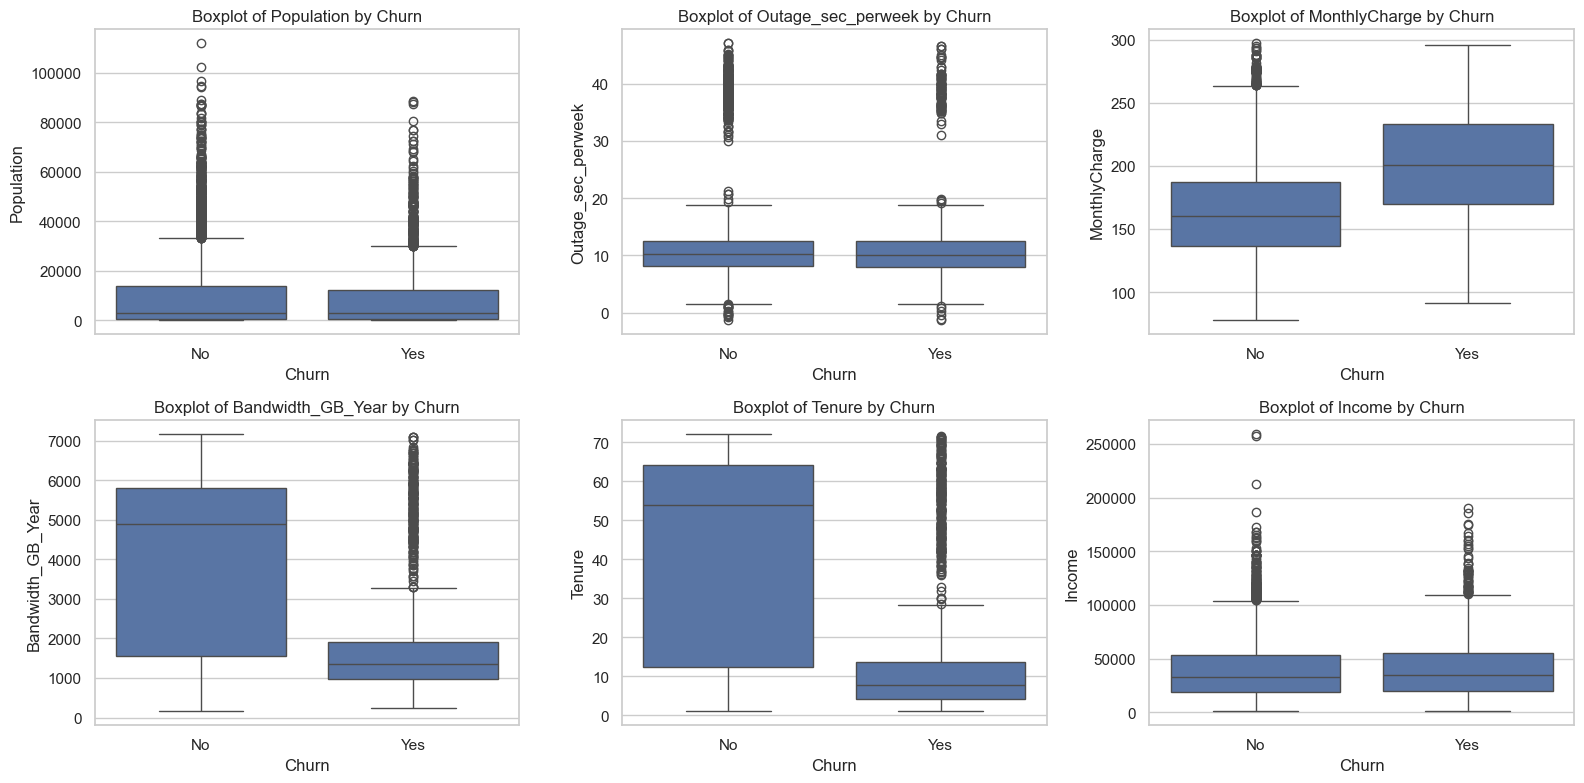

In [29]:
#2.1 Vizualzing boxplots churn and numercal features
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(16, 8))

# Create a boxplot for selected numerical features
numerical_features = ['Population', 'Outage_sec_perweek', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Tenure','Income']
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Churn', y=feature, data=df_no_outliers)
    plt.title(f'Boxplot of {feature} by Churn')

plt.tight_layout()
plt.show()

In [30]:
# Select categorical columns for one-hot encoding
categorical_columns = ['Area', 'Timezone', 'Job', 'Education', 'Employment', 'Marital', 'Gender',
                        'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService', 'Phone',
                        'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                        'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
                        'PaymentMethod', 'Outage_Group', 'Tenure_Group']

# Perform one-hot encoding
df_encoded = pd.get_dummies(df_no_outliers, dtype=int, columns=categorical_columns)

# Display the updated DataFrame with one-hot encoded columns

df_encoded.shape

(8134, 749)

In [31]:
df_encoded.head()

State  Population  Children   Age    Income Churn  Outage_sec_perweek  \
0    AK          38       0.0  68.0  28561.99    No            6.972566   
1    MI       10446       1.0  27.0  21704.77   Yes           12.014541   
2    OR        3735       4.0  50.0       NaN    No           10.245616   
3    CA       13863       1.0  48.0  18925.23    No           15.206193   
4    TX       11352       0.0  83.0  40074.19   Yes            8.960316   

   Email  Contacts  Yearly_equip_failure  ...  PaperlessBilling_No  \
0     10         0                     1  ...                    0   
1     12         0                     1  ...                    0   
2      9         0                     1  ...                    0   
3     15         2                     0  ...                    0   
4     16         2                     1  ...                    1   

   PaperlessBilling_Yes  PaymentMethod_Bank Transfer(automatic)  \
0                     1                                       0   
1                     1                                       1   
2                     1                                       0   
3                     1                                       0   
4                     0                                       0   

   PaymentMethod_Credit Card (automatic)  PaymentMethod_Electronic Check  \
0                                      1                               0   
1                                      0                               0   
2                                      1                               0   
3                                      0                               0   
4                                      0                               0   

   PaymentMethod_Mailed Check  Outage_Group_Low Outage  \
0                           0                        1   
1                           0                        1   
2                           0                        1   
3                           1                        1   
4                           1                        1   

   Outage_Group_High Outage  Tenure_Group_Low Tenure  Tenure_Group_High Tenure  
0                         0                        1                         0  
1                         0                        1                         0  
2                         0                        0                         1  
3                         0                        0                         1  
4                         0                        1                         0  

[5 rows x 749 columns]

In [32]:
pd.set_option('display.max_columns', None)
print(df_encoded)

     State  Population  Children   Age    Income Churn  Outage_sec_perweek  \
0       AK          38       0.0  68.0  28561.99    No            6.972566   
1       MI       10446       1.0  27.0  21704.77   Yes           12.014541   
2       OR        3735       4.0  50.0       NaN    No           10.245616   
3       CA       13863       1.0  48.0  18925.23    No           15.206193   
4       TX       11352       0.0  83.0  40074.19   Yes            8.960316   
...    ...         ...       ...   ...       ...   ...                 ...   
9993    ME        3209       0.0  42.0       NaN    No            9.204619   
9995    VT         640       3.0   NaN  55723.74    No            9.265392   
9996    TN       77168       4.0  48.0       NaN    No            8.115849   
9998    GA       35575       1.0  39.0  16667.58    No           12.076460   
9999    GA       12230       1.0  28.0       NaN    No           12.641760   

      Email  Contacts  Yearly_equip_failure     Tenure  Monthly

In [33]:
# Create a new DataFrame where 'Contract_Month-to-month' equals 1
df_month_to_month = df_encoded[df_encoded['Contract_Month-to-month'] == 1].copy()

# Display the new DataFrame
print(df_month_to_month.head())

   State  Population  Children   Age    Income Churn  Outage_sec_perweek  \
1     MI       10446       1.0  27.0  21704.77   Yes           12.014541   
4     TX       11352       0.0  83.0  40074.19   Yes            8.960316   
6     TN        2535       0.0   NaN  11467.50   Yes           11.129094   
8     FL       17351       2.0  49.0  58634.51    No            6.637259   
10    PA         555       7.0  23.0       NaN    No           11.835113   

    Email  Contacts  Yearly_equip_failure     Tenure  MonthlyCharge  \
1      12         0                     1   1.156681     242.948015   
4      16         2                     1   1.670972     150.761216   
6      10         0                     1  13.236774     200.064886   
8      20         2                     3   8.220686     118.366844   
10      9         0                     2  19.267262     177.451599   

    Bandwidth_GB_Year  Timely_response  Timely_fixes  Timely_replacements  \
1          800.982766                3 

### Step 4 Feature Selection & Split Dataset

In [34]:
# Selected Features
selected_features = ['MonthlyCharge', 'Bandwidth_GB_Year', 'Tenure', 'Churn', 'Outage_sec_perweek','Email']

# Create a new DataFrame with selected features
df_selected = df_month_to_month[selected_features]

# Display the first few rows of the selected DataFrame
print(df_selected.head())

# Split the data into features (X) and target variable (y)
X = df_selected.drop('Churn', axis=1)
y = df_selected['Churn']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shapes of the training and testing sets
print("\nShapes of Training and Testing Sets:")
print("X_train:", X_train.shape, "y_train:", y_train.shape)
print("X_test:", X_test.shape, "y_test:", y_test.shape)


    MonthlyCharge  Bandwidth_GB_Year     Tenure Churn  Outage_sec_perweek  \
1      242.948015         800.982766   1.156681   Yes           12.014541   
4      150.761216         271.493436   1.670972   Yes            8.960316   
6      200.064886        1907.242972  13.236774   Yes           11.129094   
8      118.366844        1312.874964   8.220686    No            6.637259   
10     177.451599        2728.767869  19.267262    No           11.835113   

    Email  
1      12  
4      16  
6      10  
8      20  
10      9  

Shapes of Training and Testing Sets:
X_train: (3560, 5) y_train: (3560,)
X_test: (890, 5) y_test: (890,)


### Step 5 Model Testing - month to month contracts

#### 5.1 Logistic Regression 

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize the Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

# Train the model
logreg_model.fit(X_train, y_train)

# Predictions on the testing set
y_pred_log = logreg_model.predict(X_test)

# Probability estimates for each class
y_proba_log = logreg_model.predict_proba(X_test)

# Evaluate the model
accuracy_log = accuracy_score(y_test, y_pred_log)
classification_rep_log = classification_report(y_test, y_pred_log)

print(f"Accuracy: {accuracy_log:.4f}")
print("\nClassification Report:")
print(classification_rep_log)

# Display probability estimates for the first few samples
print("\nProbability Estimates:")
print(y_proba_log[:5])

# Display records where the model predicted 'Yes' for churn
predicted_yes_indices = [i for i, pred in enumerate(y_pred_log) if pred == 'Yes']
print("\nRecords predicted as 'Yes' for Churn:")
print(X_test.iloc[predicted_yes_indices])


Accuracy: 0.8674

Classification Report:
              precision    recall  f1-score   support

          No       0.89      0.89      0.89       558
         Yes       0.82      0.82      0.82       332

    accuracy                           0.87       890
   macro avg       0.86      0.86      0.86       890
weighted avg       0.87      0.87      0.87       890


Probability Estimates:
[[0.05118942 0.94881058]
 [0.05676749 0.94323251]
 [0.24222992 0.75777008]
 [0.1277916  0.8722084 ]
 [0.89175229 0.10824771]]

Records predicted as 'Yes' for Churn:
      MonthlyCharge  Bandwidth_GB_Year     Tenure  Outage_sec_perweek  Email
26       222.959764        1506.446527  10.405661           16.172394     15
3521     241.475300        1570.153000  13.277940           10.095470     12
5747     236.004500        5463.710000  52.517770            6.242131     12
2991     162.015117        1233.655272   5.526815            5.976050     19
3157     287.130500         992.985600   3.589597         

#### 5.1.a Fine-tuning - adding scaler?

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Standardize the feature values
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

# Train the model
logreg_model.fit(X_train_scaled, y_train)

# Predictions on the testing set
y_pred_logS = logreg_model.predict(X_test_scaled)

# Evaluate the model
accuracy_logS = accuracy_score(y_test, y_pred_logS)
classification_rep_logS = classification_report(y_test, y_pred_logS)
print(f"Accuracy: {accuracy_logS:.4f}")

print("\nClassification Report:")
print(classification_rep_logS)



Accuracy: 0.8652

Classification Report:
              precision    recall  f1-score   support

          No       0.89      0.90      0.89       558
         Yes       0.83      0.81      0.82       332

    accuracy                           0.87       890
   macro avg       0.86      0.85      0.86       890
weighted avg       0.86      0.87      0.86       890



#### 5.2 KNN

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Standardize the feature values
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model
knn = KNeighborsClassifier()

# Define hyperparameters to search
param_grid = {
    'n_neighbors': [3, 5, 7, 8, 9, 10, 11, 12],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Create GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model with training data
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model to make predictions on the test set
best_knn = grid_search.best_estimator_
y_pred_knn = best_knn.predict(X_test_scaled)

# Evaluate the performance of the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print("Test Accuracy with Best KNN Model:", accuracy_knn)

# Display classification report
print("Classification Report:\n", classification_report(y_test, y_pred_knn))



Best Hyperparameters: {'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'uniform'}
Test Accuracy with Best KNN Model: 0.8314606741573034
Classification Report:
               precision    recall  f1-score   support

          No       0.86      0.87      0.87       558
         Yes       0.78      0.77      0.77       332

    accuracy                           0.83       890
   macro avg       0.82      0.82      0.82       890
weighted avg       0.83      0.83      0.83       890



### Step 5 Findings

After running KNN, logistic regression, random forest and decision tree models, logistic regression had the best accuracy. 

Fine tuned the models by adding scaler, changing thresholds, adjusting weights, etc...

Logistic Regression without adding standard scaler or adjusting weights yielded the best result. 

I also adjusted the outliers by removing outliers in 'MonthlyCharge', 'Bandwidth_GB_Year', 'Tenure'. Those helped the model reach a better accuracy. 

### Step 6 Understanding where the model is making mistakes and why

#### 6.1 - Confusion Matrix

In [43]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_log)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[499  59]
 [ 59 273]]


There are still some misclassifications (FP and FN), which indicate areas for potential improvement.

#### 6.2 - ROC Curve and AUC Curve

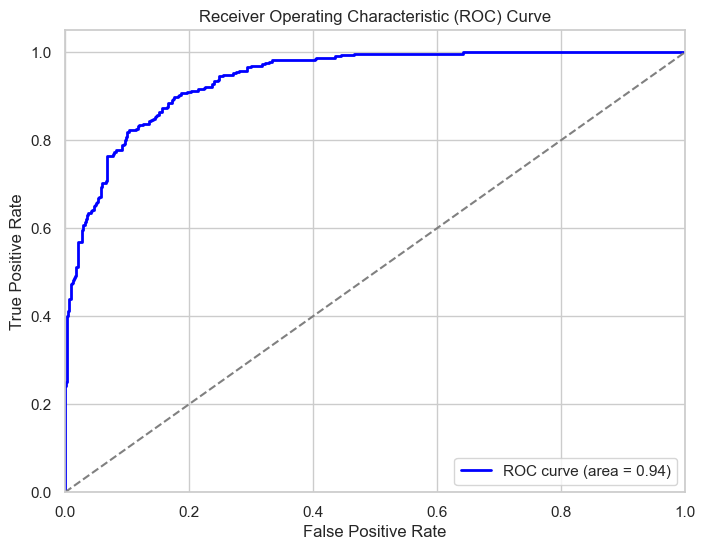

AUC Score: 0.9407468584013472


In [44]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Encode string labels into binary format
label_encoder = LabelEncoder()
y_true_binary = label_encoder.fit_transform(y_test)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_true_binary, y_proba_log[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Display AUC score
print("AUC Score:", roc_auc)


### Step 7 Input new to get a prediction

In [45]:
# New data for testing
new_data = pd.DataFrame({
    'MonthlyCharge': [100, 241, 236, 180, 287],
    'Bandwidth_GB_Year': [1506, 1570, 5463, 4761, 992],
    'Tenure': [19, 13, 52, 47, 3],
    'Outage_sec_perweek': [16, 10, 6, 11, 10],
    'Email': [15, 12, 12, 13, 12]  
})

# Preprocess the new data (e.g., scaling)
new_data_scaled = scaler.transform(new_data) 

In [46]:
# Make predictions on the new data
y_pred_log = logreg_model.predict(new_data_scaled)

# Define probability
y_proba_log = logreg_model.predict_proba(new_data_scaled)

# Display the predictions and probability estimates
print("Predictions on New Data:")
print(y_pred_log)
print("\nProbability Estimates:")
print(y_proba_log)

Predictions on New Data:
['No' 'Yes' 'Yes' 'No' 'Yes']

Probability Estimates:
[[0.97911493 0.02088507]
 [0.05096158 0.94903842]
 [0.3122043  0.6877957 ]
 [0.80761158 0.19238842]
 [0.00261713 0.99738287]]


In [47]:
# Use the best KNN model to make predictions on the new data
y_pred_knn = best_knn.predict(new_data_scaled)
y_proba_knn = best_knn.predict_proba(new_data_scaled)

# Display the prediction
print("Prediction for New Data:", y_pred_knn)

# Display the predictions and probabilities
print("Predictions and Probabilities for New Data:")
for i, (pred, proba) in enumerate(zip(y_pred_knn, y_proba_knn)):
    print(f"Sample {i+1}: Prediction = {pred}, Prob.'No' = {proba[0]:.4f}, Prob. 'Yes' = {proba[1]:.4f}")


Prediction for New Data: ['No' 'Yes' 'Yes' 'No' 'Yes']
Predictions and Probabilities for New Data:
Sample 1: Prediction = No, Prob.'No' = 0.8571, Prob. 'Yes' = 0.1429
Sample 2: Prediction = Yes, Prob.'No' = 0.0000, Prob. 'Yes' = 1.0000
Sample 3: Prediction = Yes, Prob.'No' = 0.4286, Prob. 'Yes' = 0.5714
Sample 4: Prediction = No, Prob.'No' = 1.0000, Prob. 'Yes' = 0.0000
Sample 5: Prediction = Yes, Prob.'No' = 0.0000, Prob. 'Yes' = 1.0000
